In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import copy
import random

from collections import Counter

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from base import *

plt.style.use('ggplot')

In [2]:
def read_data_as_df(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    data = []
    for line in lines[1:]:
        arr = line.strip().split(' ')
        arr[1] = int(arr[1])
        arr[2] = set(arr[2:])
        data.append(arr[:3])
    return pd.DataFrame(data, columns=['orientation', 'length', 'tags'])
        
read_data_as_df('../data/a_example.txt')

,orientation,length,tags
0,H,3,"{cat, beach, sun}"
1,V,2,"{selfie, smile}"
2,V,2,"{selfie, garden}"
3,H,2,"{cat, garden}"


In [3]:
DATA_DIR = '../data'
FILENAMES = os.listdir(DATA_DIR)

dfs = {}
keys = []
for filename in FILENAMES:
    letter = filename[0]
    if letter != 'a':
        keys.append(letter)
        dfs[letter] = read_data_as_df(os.path.join(DATA_DIR, filename))

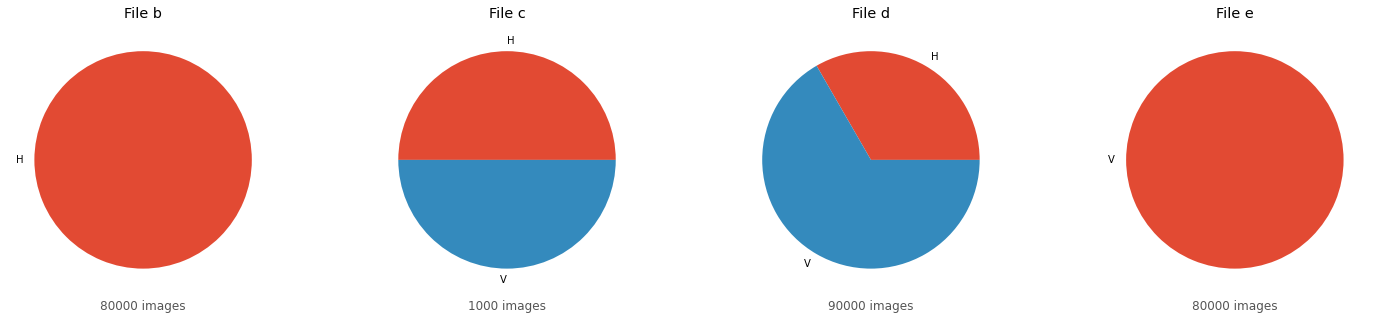

In [4]:
# Répartition V/H
def plot_repartition_VH(df, ax):
    counts = df.groupby('orientation').agg({'length':'count'}).rename({'length':'count'}, axis=1).reset_index()
    ax.pie(x=counts['count'], labels=counts.orientation)
    ax.set_xlabel(f'{df.shape[0]} images')
    
    
_, axs = plt.subplots(1, 4, figsize=(25, 5))
axs = np.ravel(axs)
for ax, key in zip(axs, keys):
    plot_repartition_VH(dfs[key], ax)
    ax.set_title(f'File {key}')

In [5]:
# Tags distribution
def groupby_tag(df):
    d = {}
    for i, tags in enumerate(df.tags):
        for tag in tags:
            if tag not in d:
                d[tag] = []
            d[tag].append(i)
    return d

def get_df_for_tags(d):
    data = []
    for tag, imgs_idx in d.items():
        data.append([tag, set(imgs_idx), len(imgs_idx)])
    return pd.DataFrame(data, columns=['tag', 'images', 'num_images'])

df_tags = {}
for key in keys:
    print(key)
    d = groupby_tag(dfs[key])
    df_tags[key] = get_df_for_tags(d)
del d

b
c
d
e


In [14]:
# Num unique tags
num_tags = {key: df_tags[key].shape[0] for key in keys}
print('Num unique words :', num_tags)

num_images = {key: dfs[key].shape[0] for key in keys}
print('Num images :\t', num_images)

mean_lengths = {key: round(dfs[key].length.mean(), 2) for key in keys}
print('Mean num tags :', mean_lengths)

std_lengths = {key: round(dfs[key].length.std(), 2) for key in keys}
print('Std num tags :', std_lengths)

Num unique words : {'b': 840000, 'c': 2166, 'd': 220, 'e': 500}
Num images :	 {'b': 80000, 'c': 1000, 'd': 90000, 'e': 80000}
Mean num tags : {'b': 18.0, 'c': 9.48, 'd': 10.03, 'e': 19.1}
Std num tags : {'b': 5.19, 'c': 2.85, 'd': 4.26, 'e': 5.59}
